# Cluster analysis - Part II
1. Load the data file `winequality-unsup.csv`
    - check the shape and plot the content; is there any column clearly useless for clustering
1. Observe the pair plot and comment the shapes in view of clustering 
1. Transform the data with PCA using the default parameters
    1. fitting the PCA estimator, fills the attribute `.pca_explained_variance_`, it is a vector containing the explained variance for each pca component, in decreasing order; plot it using as `x` the range of positions of the vector
    1. decide how many components should be used and keep only the interesting columns of the reduced dataset
1. Use the reduced data for the rest of the exercise 
1. Use the elbow method to find the optimal number of clusters, to do this test `AgglomerativeClustering` with varying number of clusters, from 2 to 10: for each value of `k`
    - fit the data
    - compute the __silhouette score__  and store it for later use
1. Plot the silhouette score versus `k`
1. Choose the optimal number of clusters looking at the plots, call it `k_opt`
1. For each possible value of the __linkage__ `'ward', 'single', 'complete', 'average'`
    - fit the data
    - compute the __silhouette score__  and store it for later use
    - compute the number of elements for each cluster and store it for later use
1. Choose the __linkage__ method producing the best result
1. Plot the clusters using the function `plot_clusters.py`
1. Plot the silhouettes using the function `plot_silhouette_w_mean.py`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score, silhouette_samples

random_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

## 1. Load the data file
Check the shape and plot the content 

In [2]:
X_url = 'winequality-unsup.csv'
X = pd.read_csv(X_url)
X.drop('Index', axis='columns', inplace=True)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## 2. Observe the data distributions

In [3]:
# X.boxplot(figsize=(15,10));

In [4]:
# sns.pairplot(X);
# plt.show()

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca_full = pca.fit_transform(X)
X_pca_full.shape

(1599, 11)

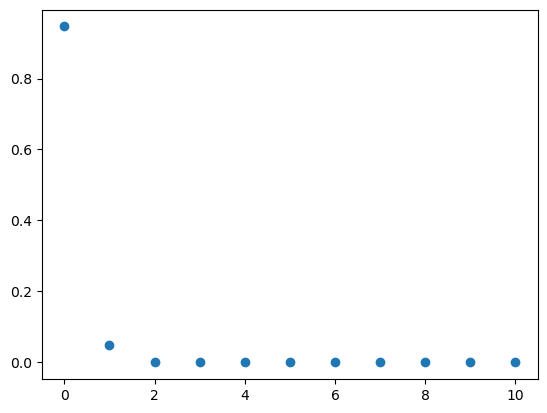

In [6]:
plt.scatter(x=range(len(pca.explained_variance_)),y=pca.explained_variance_/sum(pca.explained_variance_))
plt.show()

## 3. Use the elbow method to find the optimal number of clusters
Test `AgglomerativeClustering` with varying number of clusters, from 2 to 10


In [7]:
X_pca = X_pca_full[:,0:2]
df = pd.DataFrame(X_pca, columns=['PC1','PC2'])

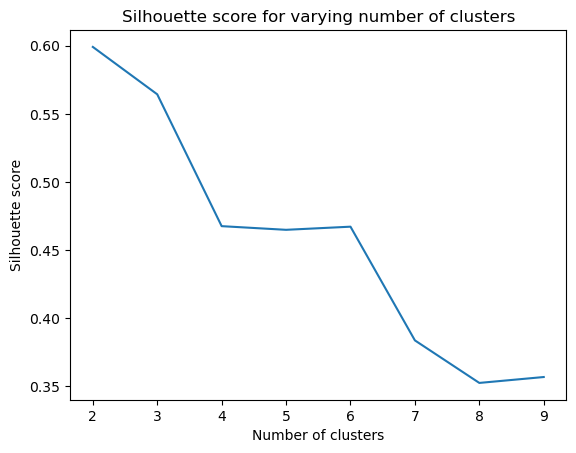

In [8]:
from sklearn.cluster import AgglomerativeClustering
k_range = list(range(2,10)) # set the range of k values to test 
silhouette_scores_ac_pca = []
for i in range(len(k_range)):
    ac = AgglomerativeClustering(n_clusters=k_range[i], linkage='ward') # KMeans(**(pg[i]), random_state=random_state)
    y_ac = ac.fit_predict(X_pca)
    silhouette_scores_ac_pca.append(silhouette_score(X_pca,y_ac))

plt.plot(k_range, silhouette_scores_ac_pca);
plt.title("Silhouette score for varying number of clusters");
plt.xlabel("Number of clusters");
plt.ylabel("Silhouette score");

In [21]:
linkages = ['ward', 'single', 'complete', 'average']
silhouette_scores_ac_pca = []
cluster_proportion = pd.DataFrame(columns=['Cluster0', 'Cluster1', 'Cluster2'])
for linkage in linkages:
    ac = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    y_ac = ac.fit_predict(X_pca)
    cluster_proportion.loc[len(cluster_proportion)] = np.unique(y_ac, return_counts=True)[1]
    # inertias_ac_pca.append(ac.inertia_)
    silhouette_scores_ac_pca.append(silhouette_score(X_pca,y_ac)) # computed on the original data
cluster_proportion['linkage']=linkages
cluster_proportion.set_index('linkage',drop=True, inplace=True)
print(silhouette_scores_ac_pca)

[0.5643443246227786, 0.6585296265346852, 0.6167951007063077, 0.6163938136075463]


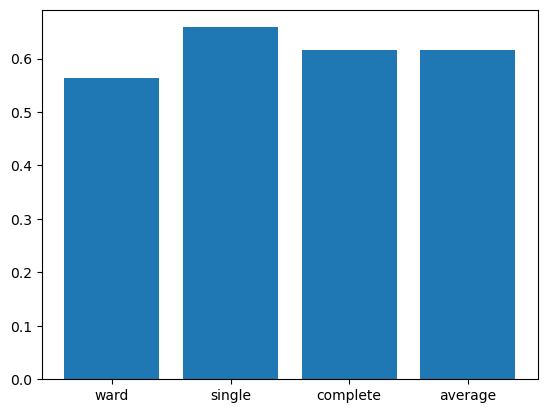

In [19]:
# plt.scatter(x=linkages,y=silhouette_scores_ac_pca, type="bar")
plt.bar(x=linkages,height=silhouette_scores_ac_pca);

In [22]:
cluster_proportion

,Cluster0,Cluster1,Cluster2
linkage,,,
ward,1134,395,70
single,1596,2,1
complete,270,2,1327
average,275,2,1322


In [12]:
print("Best linkage is '{}'".format(linkages[np.argmax(silhouette_scores_ac_pca)]))

Best linkage is 'single'


Even if `single` gives the best silhouette the proportion of cluster is not satisfactory

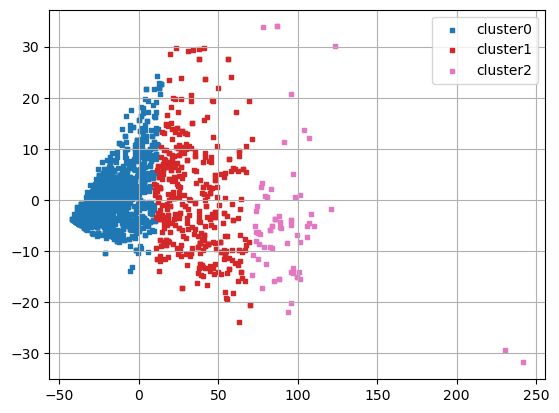

In [23]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward')#[np.argmax(silhouette_scores_ac_pca)])
y_ac = ac.fit_predict(X_pca)
from plot_clusters import plot_clusters
plot_clusters(X_pca,y_ac,[0,1])

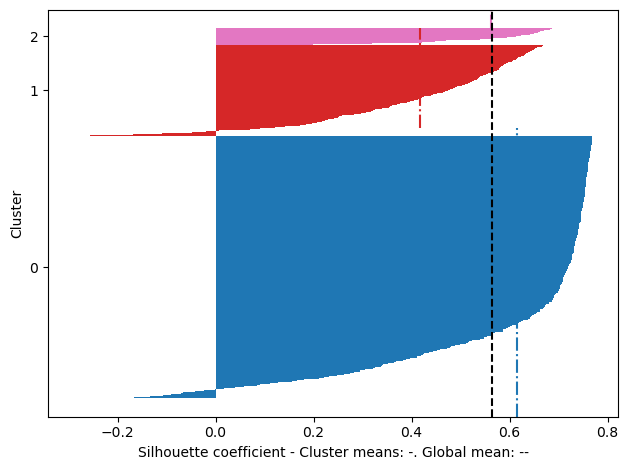

In [ ]:
from plot_silhouette_w_mean import plot_silhouette
silhouette_vals = silhouette_samples(X_pca, y_ac)
plot_silhouette(silhouette_vals,y_ac)